In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Семинарская работа

Округ - Сибирский федеральный округ

In [2]:
# Матрица граничных соседей
df_b = pd.read_excel('СФО.xlsx', sheet_name='Матрица границ')
df_b

,Unnamed: 0,Республика Алтай,Алтайский край,Иркутская область,Кемеровская область - Кузбасс,Красноярский край,Новосибирская область,Омская область,Томская область,Республика Тыва,Республика Хакасия
0,Республика Алтай,0,1,0,1,0,0,0,0,1,1
1,Алтайский край,1,0,0,1,0,1,0,0,0,0
2,Иркутская область,0,0,0,0,1,0,0,0,1,0
3,Кемеровская область - Кузбасс,1,1,0,0,1,1,0,1,0,1
4,Красноярский край,0,0,1,1,0,0,0,1,1,1
5,Новосибирская область,0,1,0,1,0,0,1,1,0,0
6,Омская область,0,0,0,0,0,1,0,1,0,0
7,Томская область,0,0,0,1,1,1,1,0,0,0
8,Республика Тыва,1,0,1,0,1,0,0,0,0,1
9,Республика Хакасия,1,0,0,1,1,0,0,0,1,0


In [3]:
# Матрица расстояний по дорогам между региональными центрами
df_roads = pd.read_excel('СФО.xlsx', sheet_name='Матрица расс меж рег цен по дор')
df_roads

,Unnamed: 0,Республика Алтай,Алтайский край,Иркутская область,Кемеровская область - Кузбасс,Красноярский край,Новосибирская область,Омская область,Томская область,Республика Тыва,Республика Хакасия
0,Республика Алтай,0,268,2160,573,1104,449,1098,769,1208,1217
1,Алтайский край,268,0,1999,411,943,234,883,553,1449,1056
2,Иркутская область,2160,1999,0,1589,1064,1875,2522,1639,1733,1472
3,Кемеровская область - Кузбасс,573,411,1589,0,534,268,914,232,1041,647
4,Красноярский край,1104,943,1064,534,0,819,1466,583,807,413
5,Новосибирская область,449,234,1875,268,819,0,653,274,1328,934
6,Омская область,1098,883,2522,914,1466,653,0,921,1975,1581
7,Томская область,769,553,1639,232,583,274,921,0,1189,796
8,Республика Тыва,1208,1449,1733,1041,807,1328,1975,1189,0,385
9,Республика Хакасия,1217,1056,1472,647,413,934,1581,796,385,0


In [4]:
# Матрица расстояний по дорогам между региональными центрами с учетом площади регионов
# Aj / dij, где dij расстояние между рег. центрами, Aj площадь региона
df_r_sq = pd.read_excel('СФО.xlsx', sheet_name='С учетом площади')
df_r_sq

,Unnamed: 0,Республика Алтай,Алтайский край,Иркутская область,Кемеровская область - Кузбасс,Красноярский край,Новосибирская область,Омская область,Томская область,Республика Тыва,Республика Хакасия
0,Республика Алтай,0.000000,626.850746,358.725000,167.059337,2143.837862,395.893096,128.542805,408.830949,139.572848,50.590797
1,Алтайский край,346.652985,0.000000,387.616808,232.907543,2509.858961,759.641026,159.841450,568.518987,116.358868,58.303977
2,Иркутская область,43.010648,84.040020,0.000000,60.242291,2224.433271,94.803200,55.963521,191.818792,97.290248,41.826766
3,Кемеровская область - Кузбасс,162.134380,408.749392,487.631215,0.000000,4432.204120,663.268657,154.420131,1355.133621,161.963497,95.160742
4,Красноярский край,84.151268,178.150583,728.238722,179.260300,0.000000,217.040293,96.275580,539.264151,208.926890,149.077482
5,Новосибирская область,206.910913,717.931624,413.251200,357.182836,2889.862027,0.000000,216.140888,1147.412409,126.960843,65.919700
6,Омская область,84.611111,190.255946,307.234734,104.731947,1614.459072,272.214395,0.000000,341.358306,85.369114,38.943074
7,Томская область,120.810143,303.790235,472.755339,412.607759,4059.686106,648.744526,153.246471,0.000000,141.803196,77.347990
8,Республика Тыва,76.906457,115.939268,447.112522,91.954851,2932.833953,133.852410,71.463291,264.416316,0.000000,159.919481
9,Республика Хакасия,76.337716,159.087121,526.389946,147.952087,5730.743341,190.316916,89.272612,394.963568,437.932468,0.000000


# Домашняя работа

In [5]:
# Матрица расстояний по дорогам между региональными центрами
df_roads

,Unnamed: 0,Республика Алтай,Алтайский край,Иркутская область,Кемеровская область - Кузбасс,Красноярский край,Новосибирская область,Омская область,Томская область,Республика Тыва,Республика Хакасия
0,Республика Алтай,0,268,2160,573,1104,449,1098,769,1208,1217
1,Алтайский край,268,0,1999,411,943,234,883,553,1449,1056
2,Иркутская область,2160,1999,0,1589,1064,1875,2522,1639,1733,1472
3,Кемеровская область - Кузбасс,573,411,1589,0,534,268,914,232,1041,647
4,Красноярский край,1104,943,1064,534,0,819,1466,583,807,413
5,Новосибирская область,449,234,1875,268,819,0,653,274,1328,934
6,Омская область,1098,883,2522,914,1466,653,0,921,1975,1581
7,Томская область,769,553,1639,232,583,274,921,0,1189,796
8,Республика Тыва,1208,1449,1733,1041,807,1328,1975,1189,0,385
9,Республика Хакасия,1217,1056,1472,647,413,934,1581,796,385,0


**Стандартизация расстояний в матрице по строкам**

In [6]:
def standardization(row):
    zero_location = np.argmin(row.values)
    new_row = np.delete(row.values, zero_location)
    standartized_row = (new_row - new_row.mean())/new_row.std()
    return np.insert(standartized_row, zero_location, 0)

df_standartized = df_roads.iloc[:,1:].apply(standardization)
df_standartized

,Республика Алтай,Алтайский край,Иркутская область,Кемеровская область - Кузбасс,Красноярский край,Новосибирская область,Омская область,Томская область,Республика Тыва,Республика Хакасия
0,0.000000,-1.086596,0.948130,-0.287553,0.790669,-0.593257,-0.412144,-0.009306,-0.060437,0.672690
1,-1.348646,0.000000,0.542509,-0.686083,0.270615,-1.004268,-0.786381,-0.526196,0.479023,0.275167
2,2.220634,2.057550,0.000000,2.211865,0.661463,2.132796,2.066522,2.072612,1.114735,1.302308
3,-0.773260,-0.826854,-0.490441,0.000000,-1.050517,-0.939271,-0.732421,-1.294352,-0.434254,-0.734692
4,0.228478,0.139457,-1.813121,-0.383496,0.000000,0.114063,0.228410,-0.454406,-0.958045,-1.312459
5,-1.007188,-1.148353,0.230104,-1.037871,-0.129924,0.000000,-1.186727,-1.193846,0.208173,-0.026063
6,0.217158,0.030475,1.860150,0.551326,1.959983,-0.203275,0.000000,0.354431,1.656433,1.571439
7,-0.403504,-0.568929,-0.364472,-1.126433,-0.892239,-0.927801,-0.720237,0.000000,-0.102967,-0.366797
8,0.424675,1.058543,-0.127649,0.863753,-0.168686,1.087108,1.114394,0.995758,0.000000,-1.381594
9,0.441653,0.344708,-0.785210,-0.105509,-1.441365,0.333906,0.428583,0.055305,-1.902660,0.000000


**Преобразование матрицы расстояний в относительную матрицу**

In [7]:
def relative_matrix(row):
    zero_location = np.argmin(np.abs(row.values))
    new_row = np.delete(row.values, zero_location)
    relative_row = 1 / new_row
    return np.insert(relative_row, zero_location, 0)

df_standartized_relative = df_standartized.apply(relative_matrix)
df_standartized_relative

,Республика Алтай,Алтайский край,Иркутская область,Кемеровская область - Кузбасс,Красноярский край,Новосибирская область,Омская область,Томская область,Республика Тыва,Республика Хакасия
0,0.000000,-0.920305,1.054707,-3.477616,1.264752,-1.685609,-2.426337,-107.455870,-16.546038,1.486568
1,-0.741484,0.000000,1.843289,-1.457550,3.695290,-0.995750,-1.271649,-1.900432,2.087584,3.634163
2,0.450322,0.486015,0.000000,0.452107,1.511801,0.468868,0.483905,0.482483,0.897074,0.767867
3,-1.293226,-1.209403,-2.038980,0.000000,-0.951913,-1.064655,-1.365335,-0.772587,-2.302799,-1.361115
4,4.376798,7.170655,-0.551535,-2.607592,0.000000,8.767049,4.378090,-2.200676,-1.043792,-0.761928
5,-0.992864,-0.870812,4.345856,-0.963511,-7.696819,0.000000,-0.842654,-0.837629,4.803688,-38.369113
6,4.604933,32.814057,0.537591,1.813808,0.510208,-4.919441,0.000000,2.821422,0.603707,0.636359
7,-2.478291,-1.757688,-2.743697,-0.887758,-1.120776,-1.077817,-1.388433,0.000000,-9.711805,-2.726302
8,2.354743,0.944694,-7.833977,1.157738,-5.928188,0.919872,0.897349,1.004260,0.000000,-0.723802
9,2.264219,2.901009,-1.273545,-9.477854,-0.693787,2.994851,2.333269,18.081517,-0.525580,0.000000


**Формирование матрицы стандартизированных расстояний**

In [8]:
def standardized_distances(row, sum_):
    zero_location = np.argmin(np.abs(row.values))
    new_row = np.delete(row.values, zero_location)
    stand_dist_row = new_row / sum_
    return np.insert(stand_dist_row, zero_location, 0)

summa = np.sum(df_standartized_relative.values)
stand_dist_matrix = df_standartized_relative.apply(standardized_distances, args=[summa])

SDM = pd.concat([df_roads.iloc[:,0], stand_dist_matrix], axis=1)
SDM

,Unnamed: 0,Республика Алтай,Алтайский край,Иркутская область,Кемеровская область - Кузбасс,Красноярский край,Новосибирская область,Омская область,Томская область,Республика Тыва,Республика Хакасия
0,Республика Алтай,0.000000,0.007126,-0.008167,0.026929,-0.009794,0.013052,0.018788,0.832077,0.128123,-0.011511
1,Алтайский край,0.005742,0.000000,-0.014273,0.011286,-0.028614,0.007711,0.009847,0.014716,-0.016165,-0.028141
2,Иркутская область,-0.003487,-0.003763,0.000000,-0.003501,-0.011707,-0.003631,-0.003747,-0.003736,-0.006946,-0.005946
3,Кемеровская область - Кузбасс,0.010014,0.009365,0.015789,0.000000,0.007371,0.008244,0.010572,0.005982,0.017832,0.010540
4,Красноярский край,-0.033891,-0.055525,0.004271,0.020192,0.000000,-0.067887,-0.033901,0.017041,0.008083,0.005900
5,Новосибирская область,0.007688,0.006743,-0.033652,0.007461,0.059600,0.000000,0.006525,0.006486,-0.037197,0.297108
6,Омская область,-0.035658,-0.254093,-0.004163,-0.014045,-0.003951,0.038093,0.000000,-0.021847,-0.004675,-0.004928
7,Томская область,0.019190,0.013611,0.021246,0.006874,0.008679,0.008346,0.010751,0.000000,0.075203,0.021111
8,Республика Тыва,-0.018234,-0.007315,0.060662,-0.008965,0.045904,-0.007123,-0.006949,-0.007776,0.000000,0.005605
9,Республика Хакасия,-0.017533,-0.022464,0.009862,0.073391,0.005372,-0.023190,-0.018067,-0.140013,0.004070,0.000000


### 1) Валовой региональный продукт на душу населения по субъектам Сибирского федерального округа в 2022 г

In [10]:
df_vrp = pd.read_excel('СФО.xlsx', sheet_name='ВРП на душу населения')
df_vrp

,Регион,"ВРП на душу населения, руб"
0,Республика Алтай,434627.5
1,Алтайский край,440933.3
2,Иркутская область,1001234.6
3,Кемеровская область - Кузбасс,848312.2
4,Красноярский край,1164188.7
5,Новосибирская область,693656.0
6,Омская область,514203.2
7,Томская область,765634.7
8,Республика Тыва,320059.3
9,Республика Хакасия,656789.1


**Расчет статистики Джири**

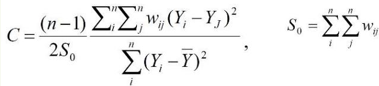

In [11]:
def geary_c(W, Y):
    n = W.shape[0]
    Y_mean = Y.mean()
    Y_i = np.repeat(Y, n).values.reshape(n, n).T
    Y_j = Y_i.T
    I = (n-1) / (2*np.sum(W.values)) * np.sum(W.values * (Y_i - Y_j)**2) / np.sum((Y_i - Y_mean)**2)
    return I

C = geary_c(stand_dist_matrix, df_vrp['ВРП на душу населения, руб'])
print(f'Статистика Джири С: {round(C, 4)}')

Статистика Джири С: 0.0637


0 =< C =< 1, значит присутствует возрастающая положительная локальная пространственная автокорреляция. Значения ВРП в соседних территориях являются подобными.

**Расчет Индекса Морана**

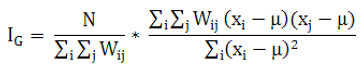

In [12]:
def index_morana(W, X):
    n = W.shape[0]
    X_mean = X.mean()
    X_i = np.repeat(X, n).values.reshape(n, n).T
    X_j = X_i.T
    I = n / np.sum(W.values) * np.sum(W.values * (X_i - X_mean) * (X_j - X_mean)) / np.sum((X_i - X_mean)**2)
    return I

IG = index_morana(stand_dist_matrix, df_vrp['ВРП на душу населения, руб'])
print(f'Индекс Морана: {round(IG, 4)}')

Индекс Морана: -0.0275


Индекс Морана меньше 0, значит гипотеза о случайном пространственном распределении регионов отклоняется

In [14]:
E_I = -1/(df_vrp.shape[0] - 1)
print(f'Ожидаемое среднее значение Индекса Морана {round(E_I, 4)}')

Ожидаемое среднее значение Индекса Морана -0.1111


IG > E_I

Значит наблюдается положительная пространственная автокорреляция (значения наблюдений в соседних территориях являются подобными)

**Расчет Z-статистики для регионов**

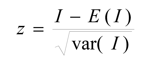

In [28]:
x_mean = df_vrp['ВРП на душу населения, руб'].mean()
x_std = df_vrp['ВРП на душу населения, руб'].std()
Z = [(x - x_mean)/x_std for x in df_vrp['ВРП на душу населения, руб']]
Z_table = pd.concat([df_vrp['Регион'], pd.DataFrame({'Z-статистика':Z})], axis=1)
Z_table

,Регион,Z-статистика
0,Республика Алтай,-0.929030
1,Алтайский край,-0.905535
2,Иркутская область,1.182155
3,Кемеровская область - Кузбасс,0.612364
4,Красноярский край,1.789323
5,Новосибирская область,0.036113
6,Омская область,-0.632530
7,Томская область,0.304307
8,Республика Тыва,-1.355913
9,Республика Хакасия,-0.101253


In [29]:
z_cr_001 = sts.norm.isf(0.01)
z_cr_005 = sts.norm.isf(0.05)
z_cr_01 = sts.norm.isf(0.1)

print('Критические значения:', round(z_cr_001,2), round(z_cr_005, 2), round(z_cr_01, 2))

Критические значения: 2.33 1.64 1.28


In [30]:
Z_table['Уровень значимости'] = None
for i in range(len(Z)):
    if abs(Z[i]) < abs(z_cr_001):
        Z_table['Уровень значимости'][i] = 'p < 0.01'
        
    if abs(Z[i]) < abs(z_cr_005):
        Z_table['Уровень значимости'][i] = 'p < 0.05'
        
    if abs(Z[i]) < abs(z_cr_01):
        Z_table['Уровень значимости'][i] = 'p < 0.1'
        
Z_table

,Регион,Z-статистика,Уровень значимости
0,Республика Алтай,-0.929030,p < 0.1
1,Алтайский край,-0.905535,p < 0.1
2,Иркутская область,1.182155,p < 0.1
3,Кемеровская область - Кузбасс,0.612364,p < 0.1
4,Красноярский край,1.789323,p < 0.01
5,Новосибирская область,0.036113,p < 0.1
6,Омская область,-0.632530,p < 0.1
7,Томская область,0.304307,p < 0.1
8,Республика Тыва,-1.355913,p < 0.05
9,Республика Хакасия,-0.101253,p < 0.1


Z-статистика для всех регионов, кроме Красноярского края и республики Тыва, оказались значимы на всех трех уровнях занчимости. Республика Тыва значима на уровне 5%, Красноярский край - на 1%. Это объяснеятся у Красноярского края высший показатель ВРП в СФО, о у Тывы, наоборот, низший

**Построение диаграммы рассеяния Морана по ВПР в СФО**

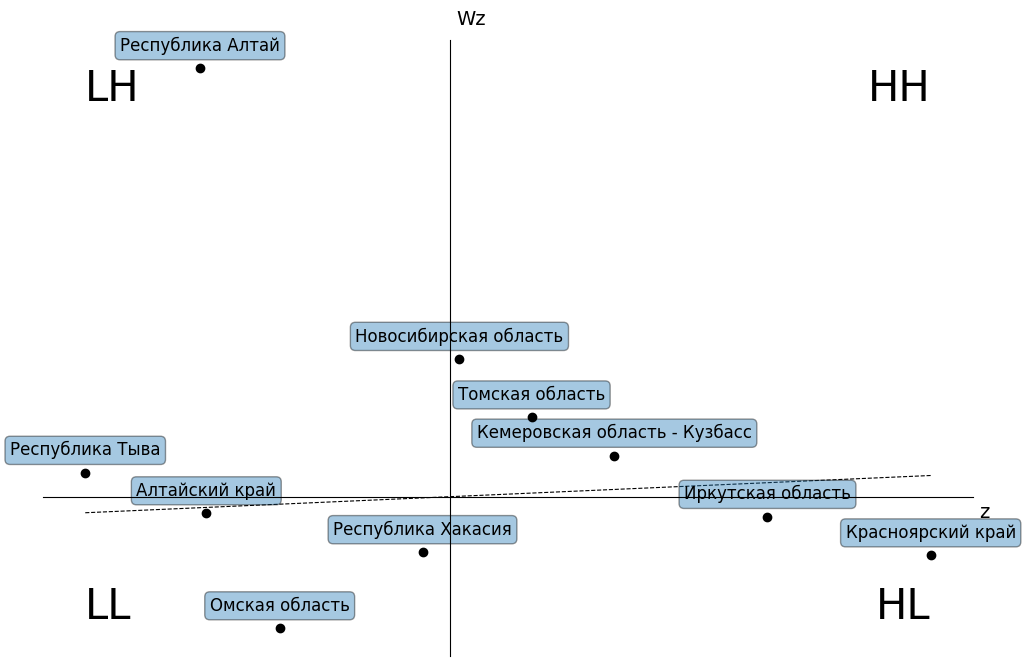

In [32]:
def determine_quadrant(z, Wz):
    if (z > 0) & (Wz > 0):
        return 'HH'
    if (z < 0) & (Wz > 0):
        return 'LH'
    if (z > 0) & (Wz < 0):
        return 'HL'
    if (z < 0) & (Wz < 0):
        return 'LL'

def plot_moran_scatter(data, IG):
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    standardized_data = sts.zscore(data, ddof=1)
    weighted_values = stand_dist_matrix.mean(axis=1)
    
    x_values = np.linspace(standardized_data.min(), standardized_data.max(), 50)
    y_values = IG * x_values
    valid_indices = np.where((y_values > weighted_values.min()) & (y_values < weighted_values.max()))
    x_values = x_values[valid_indices]
    y_values = y_values[valid_indices]
    
    plt.plot(x_values, y_values, lw=0.8, color='black', linestyle='--', zorder=1)
    plt.scatter(standardized_data, weighted_values, color='black', zorder=3)
    
    for idx, region in enumerate(df_vrp['Регион']):
        annotation = plt.annotate(region, (standardized_data[idx], weighted_values[idx]),
                                  xytext=(standardized_data[idx], weighted_values[idx] + 0.004),
                                  fontsize=12, ha='center', zorder=2)
        annotation.set_bbox(dict(alpha=0.4, edgecolor='black', boxstyle='round'))
    
    plt.text(standardized_data.min(), weighted_values.max(), 'LH', ha='left', va='top', fontsize=30, color='black')
    plt.text(standardized_data.max(), weighted_values.max(), 'HH', ha='right', va='top', fontsize=30, color='black')
    plt.text(standardized_data.min(), weighted_values.min(), 'LL', ha='left', va='bottom', fontsize=30, color='black')
    plt.text(standardized_data.max(), weighted_values.min(), 'HL', ha='right', va='bottom', fontsize=30, color='black')
    
    plt.text(0.08, weighted_values.max() + 0.01, 'Wz', ha='center', fontsize=14)
    plt.text(standardized_data.max() + 0.2, -0.005, 'z', ha='center', fontsize=14)
    
    results_df = pd.DataFrame(data).reset_index(names='Регион')
    quadrants = [determine_quadrant(standardized_data[i], weighted_values[i]) for i in range(data.shape[0])]
    results_df['Квадрант'] = quadrants
    
    return results_df.set_index(['Квадрант', 'Регион']).sort_index(ascending=False)


results = plot_moran_scatter(df_vrp['ВРП на душу населения, руб'], IG)

1) *Ядра (HL)*: Красноярский край и Иркутская область. Территории с отрицательной автокорреляцией и с относительно высоким уровнем ВРП на душу населения за 2022 год. Окружены территориями с относительно низкими значениями ВРП. Полюса роста (ядра), зоны высокой концентрации ресурсов.
2) *Спутники-противовесы (HH)*: Новосибирская, Томская, Кемеровская области. Территории с положительной автокорреляцией и с относительно высоким уровнем ВРП на душу населения за 2022 год. Окружены территориями с относительно высокими значениями ВРП. Это территории – спутники, (противовесы ядра)
3) *Периферия (LH)*: республика Алтай, республика Тыва. Территории с положительной автокорреляцией и с относительно низким уровнем ВРП на душу населения за 2022 год. Окружены территориями с относительно высокими значениями ВРП. Являются зоной влияния территорий, располагающихся в категориях  HL и HH (периферией)
4) *Территории, не связанные с другими, не испытывающие влияния ни ядер, ни спутников-противовесов (LL)*: Алтайский край, Республика Хакасия, Омская область. Территории с отрицательной автокорреляцией и с относительно низким уровнем ВРП на душу населения за 2022 год. Окружены территориями с относительно низкими значениями ВРП.

**Вывод:** можно утверждать, что в Сибирском федеральном округе присутствует положительная автокорреляция, тенденция к тому, что значения ВРП в соседних территориях являются подобными. Исходя из диаграммы рассеяния, стало ясно, что в половине регионов значение ВРП на душу населения за 2022 год выше среднего.

### 2) Средняя заработная плата педагогических работников образовательных организаций общего образования государственной и муниципальной форм собственности по регионам Сибирского федерального округа за январь-сентябрь 2023 года

In [34]:
df_sal = pd.read_excel('СФО.xlsx', sheet_name='Средняя зарплата педагогов')
df_sal

,Регион,"Средняя заработная плата, руб"
0,Республика Алтай,39567.1
1,Алтайский край,37949.6
2,Иркутская область,55684.8
3,Кемеровская область - Кузбасс,50853.0
4,Красноярский край,62908.3
5,Новосибирская область,50512.8
6,Омская область,40167.8
7,Томская область,48504.6
8,Республика Тыва,46421.6
9,Республика Хакасия,49523.2


**Расчет статистики Джири**

In [37]:
C = geary_c(stand_dist_matrix, df_sal['Средняя заработная плата, руб'])
print(f'Статистика Джири С: {round(C, 4)}')

Статистика Джири С: 0.0009


0 =< C =< 1, значит присутствует возрастающая положительная локальная пространственная автокорреляция. Значения средней зарплаты в соседних территориях являются подобными.

**Расчет Индекса Морана**

In [38]:
IG = index_morana(stand_dist_matrix, df_sal['Средняя заработная плата, руб'])
print(f'Индекс Морана: {round(IG, 4)}')

Индекс Морана: 0.0028


Индекс Морана больше 0, значит гипотеза о случайном пространственном распределении регионов отклоняется

In [39]:
E_I = -1/(df_sal.shape[0] - 1)
print(f'Ожидаемое среднее значение Индекса Морана {round(E_I, 4)}')

Ожидаемое среднее значение Индекса Морана -0.1111


IG > E_I

Значит наблюдается положительная пространственная автокорреляция (значения наблюдений в соседних территориях являются подобными)

**Расчет Z-статистики для регионов**

In [40]:
x_mean = df_sal['Средняя заработная плата, руб'].mean()
x_std = df_sal['Средняя заработная плата, руб'].std()
Z = [(x - x_mean)/x_std for x in df_sal['Средняя заработная плата, руб']]
Z_table_2 = pd.concat([df_sal['Регион'], pd.DataFrame({'Z-статистика':Z})], axis=1)
Z_table_2

,Регион,Z-статистика
0,Республика Алтай,-1.122095
1,Алтайский край,-1.332110
2,Иркутская область,0.970617
3,Кемеровская область - Кузбасс,0.343259
4,Красноярский край,1.908511
5,Новосибирская область,0.299088
6,Омская область,-1.044100
7,Томская область,0.038344
8,Республика Тыва,-0.232111
9,Республика Хакасия,0.170598


In [41]:
Z_table_2['Уровень значимости'] = None
for i in range(len(Z)):
    if abs(Z[i]) < abs(z_cr_001):
        Z_table_2['Уровень значимости'][i] = 'p < 0.01'
        
    if abs(Z[i]) < abs(z_cr_005):
        Z_table_2['Уровень значимости'][i] = 'p < 0.05'
        
    if abs(Z[i]) < abs(z_cr_01):
        Z_table_2['Уровень значимости'][i] = 'p < 0.1'
        
Z_table_2

,Регион,Z-статистика,Уровень значимости
0,Республика Алтай,-1.122095,p < 0.1
1,Алтайский край,-1.332110,p < 0.05
2,Иркутская область,0.970617,p < 0.1
3,Кемеровская область - Кузбасс,0.343259,p < 0.1
4,Красноярский край,1.908511,p < 0.01
5,Новосибирская область,0.299088,p < 0.1
6,Омская область,-1.044100,p < 0.1
7,Томская область,0.038344,p < 0.1
8,Республика Тыва,-0.232111,p < 0.1
9,Республика Хакасия,0.170598,p < 0.1


Z-статистика для всех регионов, кроме Красноярского края и Алтайского края, оказались значимы на всех трех уровнях занчимости. Алтайский край значим на уровне 5%, Красноярский край - на 1%. Это объяснеятся у Красноярского края высший показатель средней зарплаты педагогов в СФО, о у Алтайского края низший

**Построение диаграммы рассеяния Морана по средней зарплате педагогов в СФО**

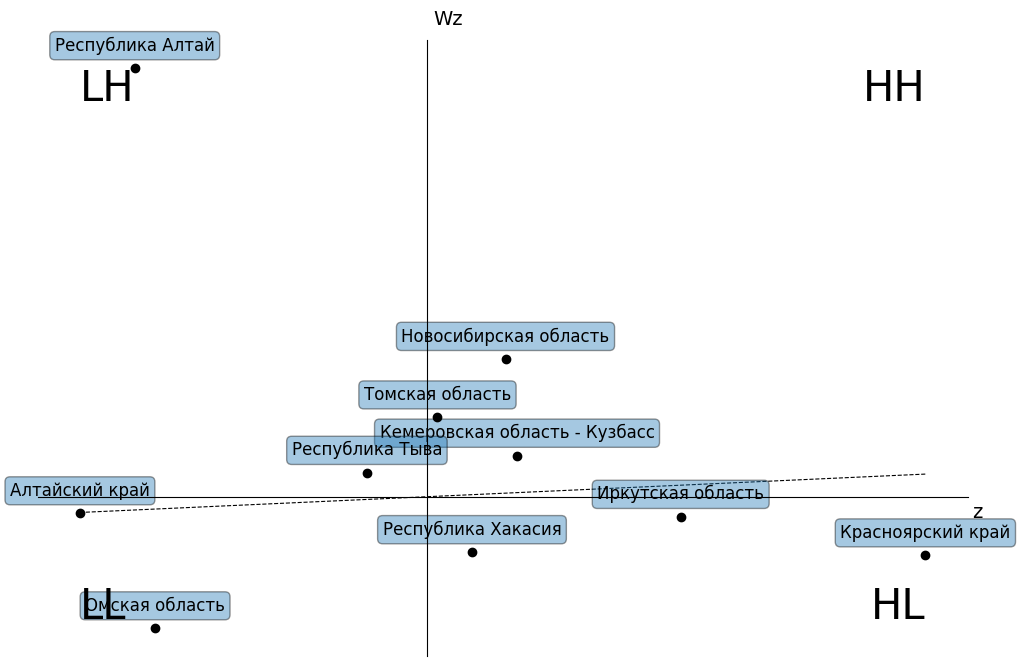

In [42]:
results_2 = plot_moran_scatter(df_sal['Средняя заработная плата, руб'], IG)

1) *Ядра (HL)*: Красноярский край, Иркутская область и Республика Хакасия. Территории с отрицательной автокорреляцией и с относительно высоким уровнем средней зарплаты педагогов. Окружены территориями с относительно низкими значениями зарплаты. Полюса роста (ядра), зоны высокой концентрации ресурсов.
2) *Спутники-противовесы (HH)*: Новосибирская, Томская, Кемеровская области. Территории с положительной автокорреляцией и с относительно высоким уровнем средней зарплаты педагогов. Окружены территориями с относительно высокими значениями зарплаты. Это территории – спутники, (противовесы ядра).
3) *Периферия (LH)*: республика Алтай, республика Тыва. Территории с положительной автокорреляцией и с относительно низким уровнем средней зарплаты педагогов. Окружены территориями с относительно высокими значениями зарплаты. Являются зоной влияния территорий, располагающихся в категориях  HL и HH.
4) *Территории, не связанные с другими, не испытывающие влияния ни ядер, ни спутников-противовесов (LL)*: Алтайский край, Омская область. Территории с отрицательной автокорреляцией и с относительно низким уровнем средней зарплаты педагогов. Окружены территориями с относительно низкими значениями зарплаты.

**Вывод:** можно утверждать, что в Сибирском федеральном округе присутствует положительная автокорреляция, тенденция к тому, что значения средней зарплаты педагогов в соседних территориях являются подобными. Исходя из диаграммы рассеяния, стало ясно, в шести из десяти регионов уровень зарплаты педагогов выше среднего.

Сравнивая результаты анализа ВРП на душу населения и средней зарплаты педагогов в СФО, было выявлено, что в обоих случаях присутствует положительная пространственная автокорреляция. Большинство регионов находятся в аналогичном квадранте на диаграмме рассеяния Морана, за исключением Хакасии, что свидетельствует о практически совпадающих территориях влияния регионов.

Кроме того, можно сделать вывод о том, что с большой вероятностью соотношение показателей зарплаты в других сферах также будет схоже с соотношением ВРП в СФО.